# 2. Tasks

## 2.2.1. seleção de fontes de dados relevantes, recolha dos dados dessas fontes, limpeza e tratamento inicial dos dados e sua estruturação, bem como integração dos dados das diferentes fontes;

## 2.2.2. exploração inicial dos dados, incluindo a sua representação gráfica e sua sumarização, bem como o seu pré-processamento, identificando-se e resolvendo-se potenciais problemas;

## 2.2.3. análise estatística dos dados, recorrendo-se a métodos de inferência e testes estatísticos sempre que apropriado;


In [2]:
#import packages
import pandas as pd
import numpy as np

#upload count matrix manually downloaded from GEO website
path = "C:\\Users\\Joana\\Desktop\\Uminho\\2_1\\SIB\\trab\\dataset"

rna_seq_tmp = pd.read_csv("GSE157103_genes.tpm.tsv", sep='\t', index_col = 0)
rna_seq_tmp.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,NC17,NC18,NC19,NC20,NC21,NC22,NC23,NC24,NC25,NC26
#symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.49,0.29,0.26,0.45,0.17,0.21,0.49,0.12,0.51,0.10,...,0.37,0.33,0.25,0.20,0.40,0.30,0.70,0.75,2.80,0.22
A1CF,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A2M,0.21,0.14,0.03,0.09,0.00,0.08,0.23,0.08,0.88,0.13,...,0.07,0.06,0.11,0.01,0.04,0.02,0.02,0.27,0.04,0.28
A2ML1,0.04,0.00,0.02,0.07,0.05,0.04,0.03,0.01,0.02,0.01,...,0.01,0.00,0.00,0.02,0.02,0.02,0.01,0.00,0.00,0.00
A3GALT2,0.07,0.00,0.00,0.00,0.07,0.00,0.07,0.00,0.79,0.15,...,0.18,0.00,0.04,0.00,0.00,0.00,0.00,0.06,0.00,0.00
A4GALT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.03,0.07,0.00,0.00,0.00,0.00,0.00,0.00
A4GNT,0.03,0.05,0.07,0.00,0.00,0.03,0.00,0.00,0.00,0.12,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00
AAAS,18.92,18.68,13.85,22.11,8.45,19.60,28.59,10.50,22.78,15.47,...,16.31,10.98,11.28,13.57,24.83,17.06,20.31,27.25,21.64,5.54
AACS,4.07,3.00,1.83,4.22,1.17,3.15,4.24,2.10,4.86,2.90,...,2.47,1.60,1.30,2.00,2.74,1.96,1.54,3.42,1.43,0.35


In [3]:
#import packages
 
import GEOparse

#download and load to the memory the experiment with specific GEO accession
gse157103 = GEOparse.get_GEO("GSE157103")

11-Jan-2021 22:30:28 DEBUG utils - Directory ./ already exists. Skipping.
11-Jan-2021 22:30:28 INFO GEOparse - File already exist: using local version.
11-Jan-2021 22:30:28 INFO GEOparse - Parsing ./GSE157103_family.soft.gz: 
11-Jan-2021 22:30:28 DEBUG GEOparse - DATABASE: GeoMiame
11-Jan-2021 22:30:28 DEBUG GEOparse - SERIES: GSE157103
11-Jan-2021 22:30:28 DEBUG GEOparse - PLATFORM: GPL24676
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753021
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753022
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753023
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753024
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753025
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753026
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753027
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753028
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753029
11-Jan-2021 22:30:28 DEBUG GEOparse - SAMPLE: GSM4753030
11-Jan-2021 22:30:28 DEBUG GEOpars

In [4]:
#access to metadata
metadata_original = gse157103.phenotype_data
metadata = gse157103.phenotype_data
metadata.head(35)
#type(metadata)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,relation,supplementary_file_1,series_id,data_row_count,characteristics_ch1.14.fibrinogen,characteristics_ch1.15.sofa,characteristics_ch1.16.associated controlled-vocabulary terms,characteristics_ch1.17.cell type,characteristics_ch1.18.tissue of origin,characteristics_ch1.19.sample type
GSM4753021,COVID_01_39y_male_NonICU,GSM4753021,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753022,COVID_02_63y_male_NonICU,GSM4753022,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753023,COVID_03_33y_male_NonICU,GSM4753023,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753024,COVID_04_49y_male_NonICU,GSM4753024,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753025,COVID_05_49y_male_NonICU,GSM4753025,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753026,COVID_06_:y_male_NonICU,GSM4753026,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753027,COVID_07_38y_female_NonICU,GSM4753027,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753028,COVID_08_78y_male_ICU,GSM4753028,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753029,COVID_09_64y_female_ICU,GSM4753029,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753030,COVID_10_62y_male_ICU,GSM4753030,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(metadata.columns)

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.disease state',
       'characteristics_ch1.1.age (years)', 'characteristics_ch1.2.Sex',
       'characteristics_ch1.3.icu', 'characteristics_ch1.4.apacheii',
       'characteristics_ch1.5.charlson score',
       'characteristics_ch1.6.mechanical ventilation',
       'characteristics_ch1.7.ventilator-free days',
       'characteristics_ch1.8.dm',
       'characteristics_ch1.9.hospital-free days post 45 day followup (days)',
       'characteristics_ch1.10.ferritin (ng/ml)',
       'characteristics_ch1.11.crp (mg/l)',
       'characteristics_ch1.12.ddimer (mg/l_feu)',
       'characteristics_ch1.13.procalcitonin (ng/ml)',
       'characteristics_ch1.14.lactate (mmol/l)',
       'characteristics_ch1.15.fibrinogen', 'characteristics_ch1.16.sofa',
       'characteristics_ch1.17.associated controlled-vo

In [15]:
metadata['treatment_protocol_ch1'].values

array(['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A',
       'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'],
      dtype=object)

Data from treatment_protocol not available.

In [20]:
#dataframe dimensions

print("na_seq_tmp: ",rna_seq_tmp.shape)

print("metadata: ",metadata.shape)

na_seq_tmp:  (19472, 126)
metadata:  (125, 61)


In [17]:
#data description
rna_seq_tmp.apply(pd.Series.describe, axis=1) #describe by row

,count,mean,std,min,25%,50%,75%,max
#symbol,,,,,,,,
A1BG,126.0,0.362381,0.301175,0.05,0.2100,0.310,0.4200,2.80
A1CF,126.0,0.002222,0.004714,0.00,0.0000,0.000,0.0000,0.02
A2M,126.0,0.123651,0.136109,0.00,0.0400,0.090,0.1500,0.88
A2ML1,126.0,0.014127,0.019111,0.00,0.0000,0.010,0.0200,0.10
A3GALT2,126.0,0.129206,0.231398,0.00,0.0000,0.050,0.1675,1.75
...,...,...,...,...,...,...,...,...
ZYG11A,126.0,0.155794,0.075877,0.02,0.1000,0.140,0.2000,0.37
ZYG11B,126.0,5.195238,2.542537,0.65,3.2600,4.815,7.1250,12.42
ZYX,126.0,375.867063,147.352997,115.92,276.8475,354.515,455.0200,806.75


Como estes dados já foram normalizados em TMP, é expectável as médias estarem próximas de 0, com sd próximo de 1.

In [21]:
#data description by col
metadata.describe()

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,relation,supplementary_file_1,series_id,data_row_count,characteristics_ch1.14.fibrinogen,characteristics_ch1.15.sofa,characteristics_ch1.16.associated controlled-vocabulary terms,characteristics_ch1.17.cell type,characteristics_ch1.18.tissue of origin,characteristics_ch1.19.sample type
count,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,1,1,1,1,1,1
unique,125,125,1,1,1,1,1,1,1,1,...,125,1,1,1,1,1,1,1,1,1
top,COVID_86_52y_female_NonICU,GSM4753111,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,unknown,unknown,DOID:0080600 UBERON:0003100 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells
freq,1,1,125,125,125,125,125,125,125,125,...,1,125,125,125,1,1,1,1,1,1


Neste caso, como se tratam de metadados, a descrição não é feita por médias ou sd.

In [22]:
#check NAs
print("number of NAs in rna_seq _>", rna_seq_tmp.isnull().sum().sum())

print("number of NAs in metadata _>", metadata.isnull().sum().sum())
#print(metadata.shape)

number of NAs in rna_seq _> 0
number of NAs in metadata _> 751


In [23]:
#remove NA from metadata["characteristics_ch1.1.age (years)"]

v=metadata["characteristics_ch1.1.age (years)"]!=":"
#print("v.values", v.values)

metadata=metadata[v.values]
print(metadata.shape)

(125, 61)


In [24]:
#replace ">89" from metadata["characteristics_ch1.1.age (years)"] by "90" (keep str for now)
metadata["characteristics_ch1.1.age (years)"].replace(to_replace = ">89", value = "90", inplace=True)

print(metadata["characteristics_ch1.1.age (years)"].values)

print(metadata.shape)

['39' '63' '33' '49' '49' '38' '78' '64' '62' '52' '50' '37' '55' '68'
 '48' '54' '70' '51' '62' '66' '43' '76' '55' '55' '41' '71' '63' '63'
 '54' '50' '72' '81' '64' '58' '68' '87' '68' '80' '66' '74' '21' '83'
 '46' '62' '62' '78' '72' '73' '37' '58' '71' '35' '62' '33' '30' '62'
 '55' '49' '54' '78' '39' '65' '84' '66' '57' '79' '77' '81' '37' '50'
 '82' '55' '55' '73' '55' '80' '27' '71' '67' '85' '75' '62' '52' '61'
 '90' '86' '29' '82' '81' '24' '49' '51' '76' '81' '71' '74' '58' '84'
 '83' '54' '65' '65' '90' '83' '75' '50' '53' '49' '67' '58' '82' '65'
 '75' '83' '40' '84' '88' '66' '62' '71' '63' '42' '32' '62' '36']
(125, 61)


Two samples successfully removed.

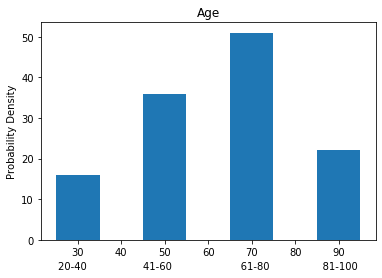

In [25]:
#graphs
import matplotlib.pyplot as plt

values = metadata.loc[:, "characteristics_ch1.1.age (years)"]
values = values.astype(int)
plt.hist(values, bins = [20, 40, 60, 80, 100], rwidth = 0.5)
plt.xlabel('20-40                  41-60                      61-80                 81-100')
plt.ylabel("Probability Density")
plt.title("Age")
plt.show()

In [26]:
from scipy import stats
cv = metadata[metadata['characteristics_ch1.0.disease state']=='COVID-19']
ncv = metadata[metadata['characteristics_ch1.0.disease state']=='non-COVID-19']

#Age
cv_age = cv["characteristics_ch1.1.age (years)"]
ncv_age = ncv["characteristics_ch1.1.age (years)"]

print("check Age distr; COVID-19/non-COVID-19 groups")
print("shapiro")
print ('COVID-19', stats.shapiro(cv_age)) # # Não rejeita H0, teste inconclusivo
print ('non-COVID-19',  stats.shapiro(ncv_age)) # p-values >0.05, HO: dados seguem uma distribuição normal ...  
#not rejected!!
print(stats.mannwhitneyu(cv_age, ncv_age))
#P-value > α: The difference between the medians is not statistically significant (Fail to reject H0)
#teste U de Mann-Whitney (também conhecido por teste da soma dos postos de Wilcoxon, 
#teste de Wilcoxon-Mann-Whitney ou teste de Mann-Whitney)[1] 
#É um teste não paramétrico aplicado para duas amostras independentes.

print("""\ncheck Age distr; female COVID-19/female non-COVID-19; male COVID-19/male non-COVID-19; female COVID-19/male COVID-19; female non-COVID-19/male non-COVID-19""")

cv_female = cv[cv['characteristics_ch1.2.Sex'] == 'female']
cv_age_female = cv_female["characteristics_ch1.1.age (years)"]
cv_age_female=pd.to_numeric(cv_age_female, errors='coerce')

cv_male=cv[cv['characteristics_ch1.2.Sex'] == 'male']
cv_age_male = cv_male["characteristics_ch1.1.age (years)"]
cv_age_male=pd.to_numeric(cv_age_male, errors='coerce')

ncv_female=ncv[ncv['characteristics_ch1.2.Sex'] == 'female']
ncv_age_female = ncv_female["characteristics_ch1.1.age (years)"]
ncv_age_female=pd.to_numeric(ncv_age_female, errors='coerce')

ncv_male=ncv[ncv['characteristics_ch1.2.Sex'] == 'male']
ncv_age_male = ncv_male["characteristics_ch1.1.age (years)"]
ncv_age_male=pd.to_numeric(ncv_age_male, errors='coerce')

print("shapiro")
print ('COVID-19 + Female', stats.shapiro(cv_age_female)) 
print ('non-COVID-19 + Female',  stats.shapiro(ncv_age_female))
print ('COVID-19 + male', stats.shapiro(cv_age_male))
print ('non-COVID-19 + male',  stats.shapiro(ncv_age_male))
# p-values >0.05, HO: dados seguem uma distribuição normal ...  not rejected!!

#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate’)
#statsmodels.stats.ttest_ind(x1, x2,alternative='two-sided', usevar='pooled',weights=(None, None), value=0)
print("\nttest")
print("COVID19 female/COVID19 male:", stats.ttest_ind(cv_age_female,cv_age_male)) #não há diferenças entre os 
#valores médios
print("nonCOVID19 female/nonCOVID19 male:", stats.ttest_ind(ncv_age_female,ncv_age_male))
print("COVID19 female/nonCOVID19 female:", stats.ttest_ind(cv_age_female,ncv_age_female))
print("COVID19 male/nonCOVID19 male:", stats.ttest_ind(cv_age_male,ncv_age_male))

check Age distr; COVID-19/non-COVID-19 groups
shapiro
COVID-19 (0.969968318939209, 0.02303556352853775)
non-COVID-19 (0.9655020833015442, 0.5111427307128906)
MannwhitneyuResult(statistic=1169.0, pvalue=0.2372767989887578)

check Age distr; female COVID-19/female non-COVID-19; male COVID-19/male non-COVID-19; female COVID-19/male COVID-19; female non-COVID-19/male non-COVID-19
shapiro
COVID-19 + Female (0.9534679651260376, 0.11588154733181)
non-COVID-19 + Female (0.9619491696357727, 0.7834566831588745)
COVID-19 + male (0.9731571674346924, 0.19940562546253204)
non-COVID-19 + male (0.9297250509262085, 0.3772066831588745)

ttest
COVID19 female/COVID19 male: Ttest_indResult(statistic=-0.5167418333477375, pvalue=0.606512568083234)
nonCOVID19 female/nonCOVID19 male: Ttest_indResult(statistic=-1.1834691341842989, pvalue=0.24871154995213496)
COVID19 female/nonCOVID19 female: Ttest_indResult(statistic=0.09977742688908672, pvalue=0.9209281394772523)
COVID19 male/nonCOVID19 male: Ttest_indResult(s

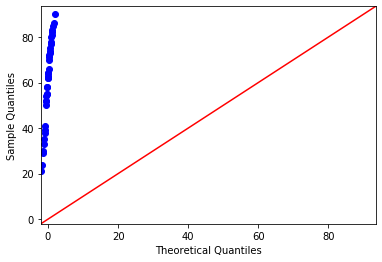

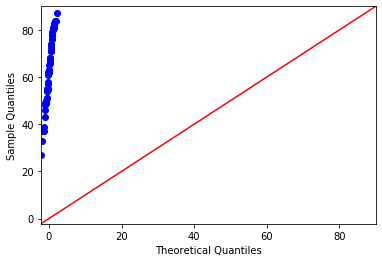

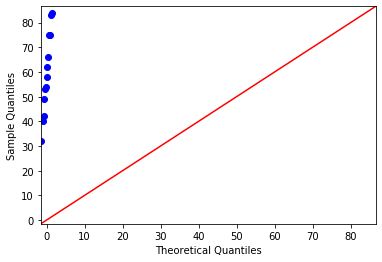

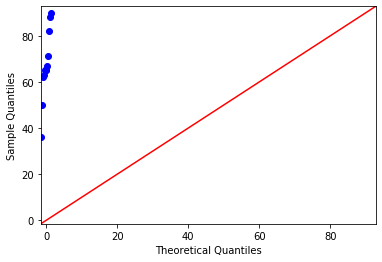

In [27]:
import statsmodels.api as sm

var_list=[cv_age_female, cv_age_male, ncv_age_female, ncv_age_male]
for var in var_list:
    sm.qqplot(var,line="45")

C:\Users\Joana\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


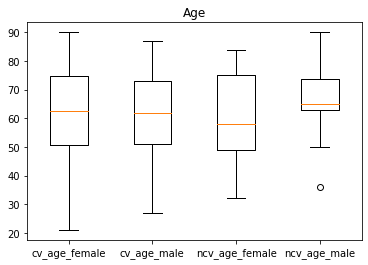

In [28]:
plt.boxplot((cv_age_female,cv_age_male,ncv_age_female,ncv_age_male), labels=["cv_age_female","cv_age_male","ncv_age_female","ncv_age_male"])
plt.title('Age')
plt.show()

Counter({'male': 73, 'female': 51, 'unknown': 1})


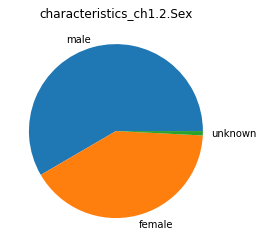

Counter({'COVID-19': 99, 'non-COVID-19': 26})


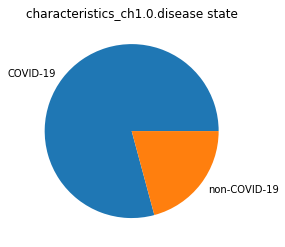

Counter({'yes': 66, 'no': 59})


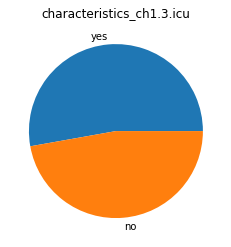

In [29]:
#imports
import matplotlib.pyplot as plt

from collections import Counter
pie_charts = ['characteristics_ch1.2.Sex','characteristics_ch1.0.disease state','characteristics_ch1.3.icu']
  
for c in pie_charts:
    var = Counter(metadata[c])
    print(var)
    var_count = metadata.loc[:, c].value_counts()
    plt.pie(var_count, labels = var_count.index)#, autopct='%1.1f%%', shadow=True, colors = ('turquoise', 'pink'), startangle = 90)
    plt.title(c)
    plt.show()

In [30]:
state_sex = metadata.groupby(['characteristics_ch1.2.Sex','characteristics_ch1.0.disease state']).size()
print(state_sex,"\n")

state_icu = metadata.groupby(['characteristics_ch1.0.disease state','characteristics_ch1.3.icu']).size()
print(state_icu,"\n")

vent_icu = metadata.groupby(['characteristics_ch1.3.icu','characteristics_ch1.6.mechanical ventilation']).size()
print(vent_icu)

characteristics_ch1.2.Sex  characteristics_ch1.0.disease state
female                     COVID-19                               38
                           non-COVID-19                           13
male                       COVID-19                               61
                           non-COVID-19                           12
unknown                    non-COVID-19                            1
dtype: int64 

characteristics_ch1.0.disease state  characteristics_ch1.3.icu
COVID-19                             no                           49
                                     yes                          50
non-COVID-19                         no                           10
                                     yes                          16
dtype: int64 

characteristics_ch1.3.icu  characteristics_ch1.6.mechanical ventilation
no                         no                                              54
                           yes                                           

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

v = metadata['characteristics_ch1.2.Sex']!='unknown'

metadata = metadata[v.values]
print(metadata['characteristics_ch1.2.Sex'].values)
metadata['characteristics_ch1.1.age (years)'] = pd.to_numeric(metadata['characteristics_ch1.1.age (years)'],errors='coerce')

['male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male']


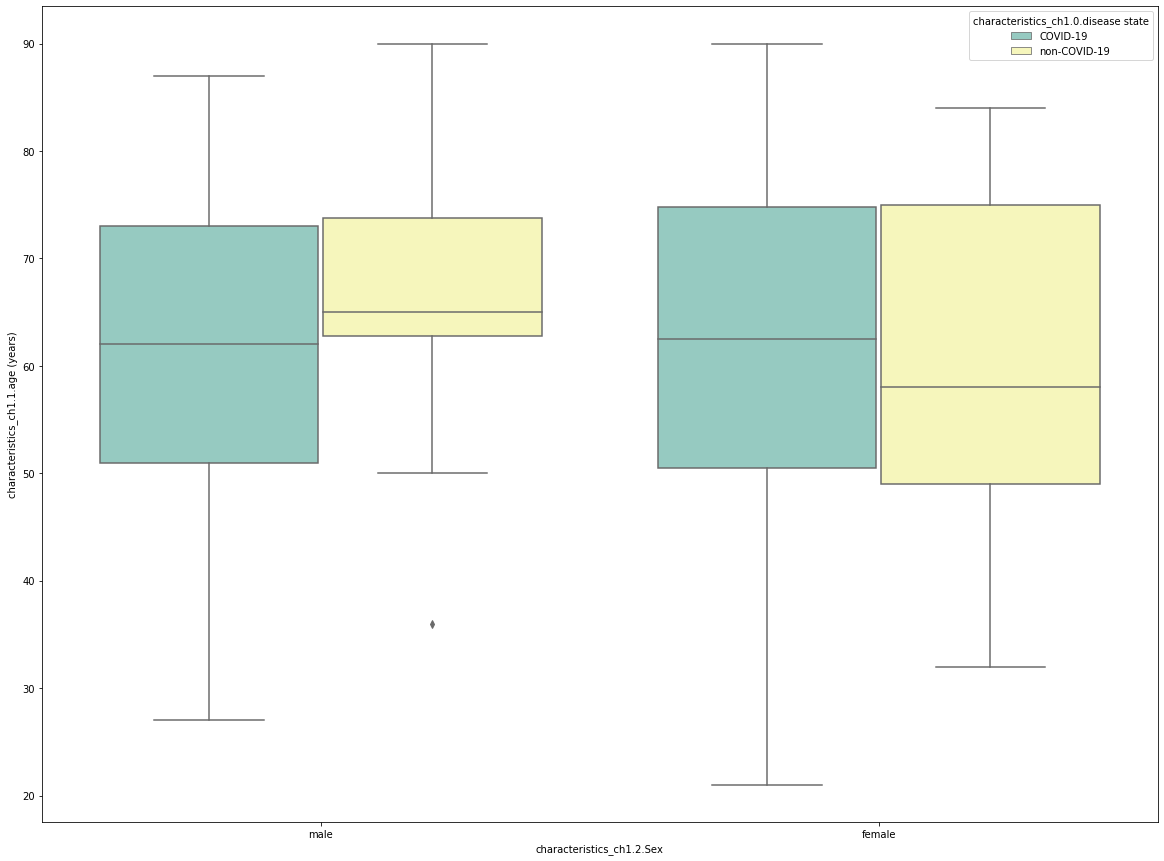

In [32]:
plt.figure(figsize=(20,15))
ax=sns.boxplot(x = 'characteristics_ch1.2.Sex', y = 'characteristics_ch1.1.age (years)', hue = 'characteristics_ch1.0.disease state', data = metadata, palette='Set3')

characteristics_ch1.3.icu  no  yes
characteristics_ch1.2.Sex         
female                     27   24
male                       32   41

f_yes,m_yes:  47.05882352941176 43.83561643835616


characteristics_ch1.6.mechanical ventilation  no  yes
characteristics_ch1.2.Sex                            
female                                        35   16
male                                          38   35

f_yes0,m_yes0:  31.372549019607842 47.94520547945205




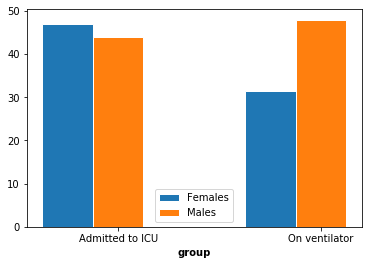

In [33]:
values="characteristics_ch1.0.disease state"

table1=pd.pivot_table(metadata,values ,index=['characteristics_ch1.2.Sex'],columns=['characteristics_ch1.3.icu'],aggfunc=np.size)
print(table1)
#percentagem 
f_yes =24/(27+24)*100
m_yes=32/(41+32)*100
print("\nf_yes,m_yes: ",f_yes,m_yes)
print("\n")

table2=pd.pivot_table(metadata,values ,index=['characteristics_ch1.2.Sex'],columns=['characteristics_ch1.6.mechanical ventilation'],aggfunc=np.size)
print(table2)
f_yes0 =16/(35+16)*100
m_yes0=35/(38+35)*100
print("\nf_yes0,m_yes0: ", f_yes0,m_yes0)
print("\n")
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [f_yes,f_yes0]
bars2 = [m_yes,m_yes0]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Females')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Males')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Admitted to ICU', 'On ventilator'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [34]:
from scipy import stats

cv = metadata[metadata['characteristics_ch1.0.disease state']=='COVID-19']
ncv = metadata[metadata['characteristics_ch1.0.disease state']=='non-COVID-19']

cv_iuc = cv['characteristics_ch1.3.icu']
print(sum(cv_iuc == 'yes'), len(cv_iuc), "cv_iuc_yes")
ncv_iuc = ncv['characteristics_ch1.3.icu'] #col para ncv
print(sum(ncv_iuc == 'yes'), len(ncv_iuc), "ncv_iuc_yes")

50 99 cv_iuc_yes
15 25 ncv_iuc_yes


In [35]:
print(stats.fisher_exact([[50, 49], [15, 10]]))

(0.6802721088435374, 0.5025623499870514)
